In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data=pd.read_csv("C:/newexcel2/housing.csv")

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


In [5]:
data['housing_median_age']

0        41
1        21
2        52
3        52
4        52
         ..
20635    25
20636    18
20637    17
20638    18
20639    16
Name: housing_median_age, Length: 20640, dtype: int64

<Axes: ylabel='Density'>

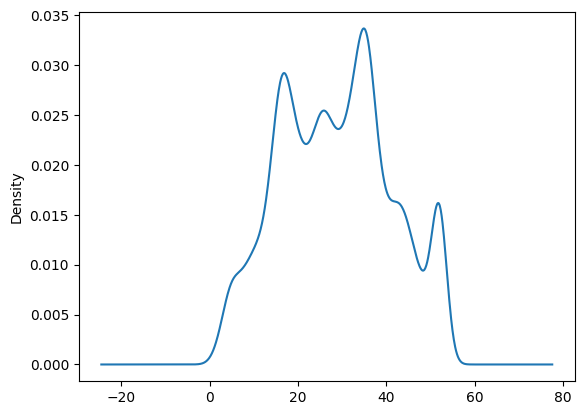

In [6]:
data['housing_median_age'].plot(kind='kde')

In [8]:
data['total_rooms'].value_counts()

total_rooms
1527    18
1613    17
1582    17
2127    16
2053    15
        ..
4528     1
166      1
9807     1
5593     1
4242     1
Name: count, Length: 5926, dtype: int64

<Axes: >

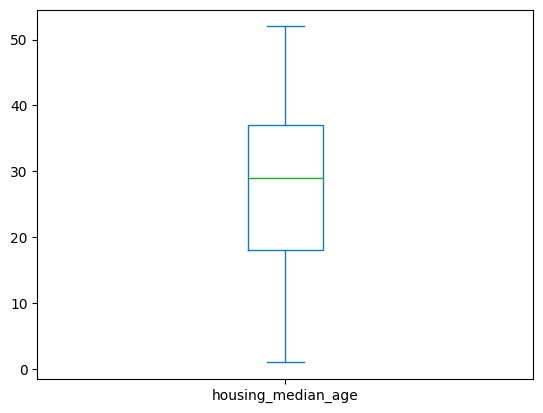

In [7]:
data['housing_median_age'].plot(kind='box')

In [11]:
data.groupby('median_income')['housing_median_age'].mean()

median_income
0.4999     33.500000
0.5360     30.100000
0.5495     38.000000
0.6433     24.000000
0.6775     52.000000
             ...    
14.4219    52.000000
14.5833    24.000000
14.9009     8.000000
15.0000    29.000000
15.0001    39.408163
Name: housing_median_age, Length: 12928, dtype: float64

<Axes: title={'center': '\thousing median age'}, xlabel='housing_median_age'>

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


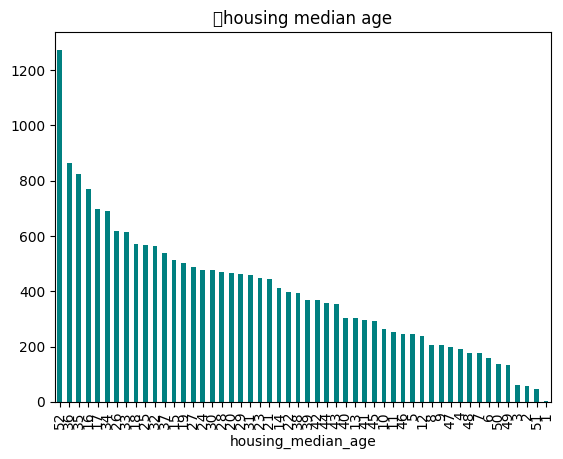

In [8]:
data['housing_median_age'].value_counts().plot(kind='bar', title='	housing median age', color='teal')

In [9]:
(data.groupby('median_income')['median_house_value'].mean())

median_income
0.4999     163608.500000
0.5360     166999.900000
0.5495      91700.000000
0.6433     111300.000000
0.6775     350000.000000
               ...      
14.4219    500001.000000
14.5833    500001.000000
14.9009    500001.000000
15.0000    500001.000000
15.0001    487374.408163
Name: median_house_value, Length: 12928, dtype: float64

In [10]:
(data.groupby('total_rooms')['total_bedrooms'].mean())

total_rooms
2           2.0
6           2.0
8           1.0
11         11.0
12          4.0
          ...  
30450    5033.0
32054    5290.0
32627    6445.0
37937    5471.0
39320    6210.0
Name: total_bedrooms, Length: 5926, dtype: float64

In [11]:
(data.groupby('total_rooms')['population'].mean())

total_rooms
2            6.0
6            8.0
8           13.0
11          24.0
12          18.0
          ...   
30450     9419.0
32054    15507.0
32627    28566.0
37937    16122.0
39320    16305.0
Name: population, Length: 5926, dtype: float64

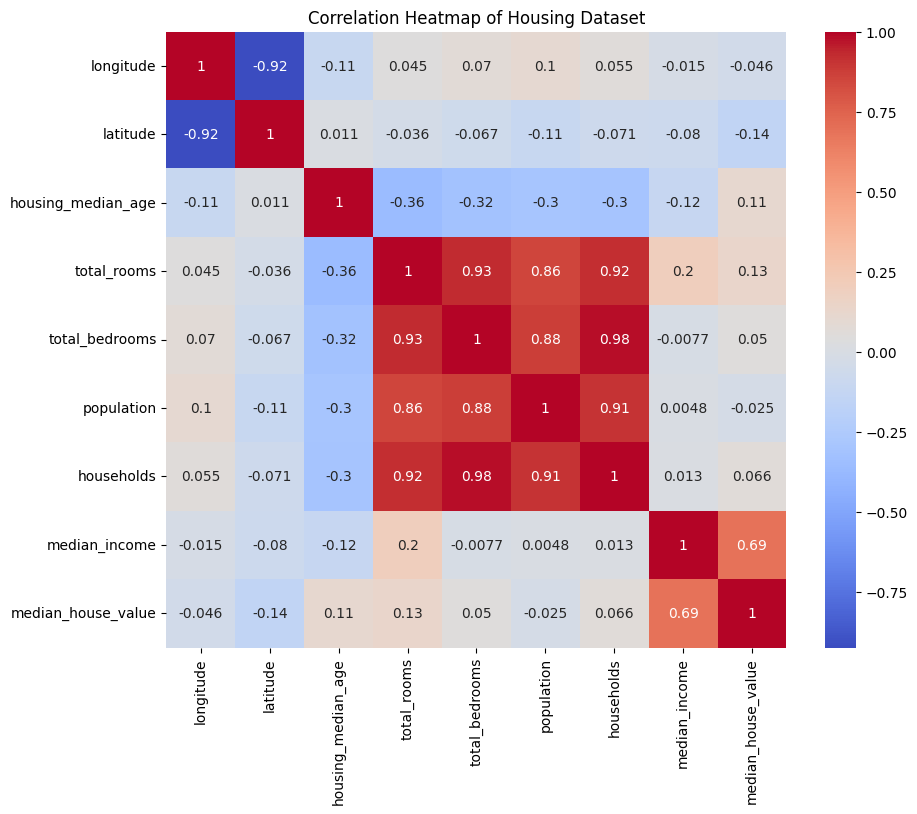

In [13]:
corr = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Housing Dataset')
plt.show()

In [15]:
(data.groupby('housing_median_age')['median_house_value'].mean())
(data.groupby('households')['median_income'].mean())

households
1       15.000100
2        2.875000
3        1.811250
4        6.751450
5        4.308729
          ...    
4930     5.335900
5050     6.019100
5189     7.494700
5358     4.951600
6082     2.308700
Name: median_income, Length: 1815, dtype: float64

In [18]:
# Create income categories
data['income_category'] = pd.cut(data['median_income'], bins=[0, 2, 4, 6, 8, 10], labels=['Low', 'Medium', 'High', 'Higher', 'Very High'])

# Group by income category
income_group = data.groupby('income_category')['median_house_value'].mean()
print(income_group)


income_category
Low          112497.156695
Medium       168199.345880
High         244635.195284
Higher       344844.687201
Very High    443244.979058
Name: median_house_value, dtype: float64


C:\Users\nigam\AppData\Local\Temp\ipykernel_15996\3355203880.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_group = data.groupby('income_category')['median_house_value'].mean()


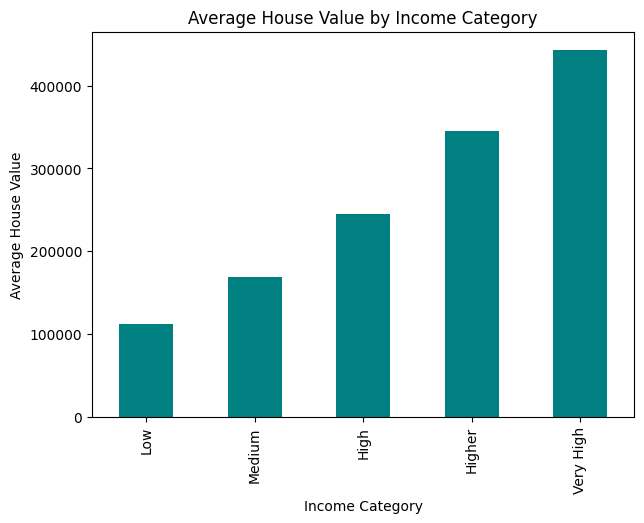

In [19]:
income_group.plot(kind='bar', color='teal', figsize=(7,5))
plt.title('Average House Value by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Average House Value')
plt.show()


C:\Users\nigam\AppData\Local\Temp\ipykernel_15996\1732757573.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = data.pivot_table(values='median_house_value',


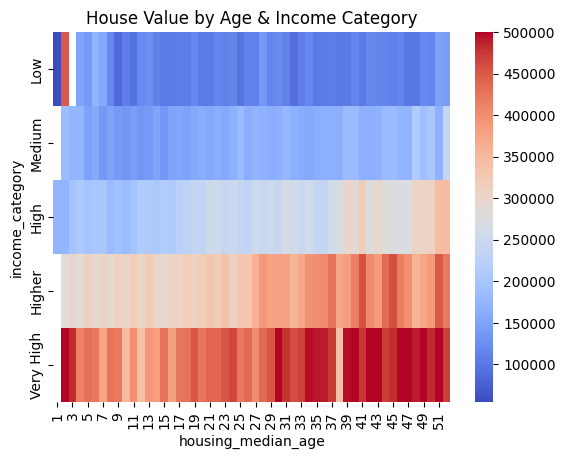

In [20]:
pivot = data.pivot_table(values='median_house_value', 
                       index='income_category', 
                       columns='housing_median_age', 
                       aggfunc='mean')
sns.heatmap(pivot, cmap='coolwarm')
plt.title('House Value by Age & Income Category')
plt.show()


In [21]:
data['total_rooms'].value_counts()

total_rooms
1527    18
1613    17
1582    17
2127    16
2053    15
        ..
4528     1
166      1
9807     1
5593     1
4242     1
Name: count, Length: 5926, dtype: int64

In [22]:
#You can check how house values vary with latitude (north-south regions).
region_group = data.groupby('latitude')['median_house_value'].mean()
print(region_group.head())


latitude
32.54     67500.000000
32.55    115466.666667
32.56    150600.000000
32.57    131327.777778
32.58    138088.461538
Name: median_house_value, dtype: float64


In [23]:
multi_group = data.groupby(['housing_median_age', 'income_category'])['median_house_value'].mean()
print(multi_group.head(10))


housing_median_age  income_category
1                   Low                 55000.000000
                    Medium                       NaN
                    High               174066.666667
                    Higher                       NaN
                    Very High                    NaN
2                   Low                450000.000000
                    Medium             185507.692308
                    High               174482.142857
                    Higher             286533.416667
                    Very High          500001.000000
Name: median_house_value, dtype: float64


C:\Users\nigam\AppData\Local\Temp\ipykernel_15996\2453762246.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multi_group = data.groupby(['housing_median_age', 'income_category'])['median_house_value'].mean()


In [24]:
data.groupby('income_category')['median_house_value'].agg(['mean', 'max', 'min'])


C:\Users\nigam\AppData\Local\Temp\ipykernel_15996\3129142287.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('income_category')['median_house_value'].agg(['mean', 'max', 'min'])


,mean,max,min
income_category,,,
Low,112497.156695,500001,14999
Medium,168199.345880,500001,14999
High,244635.195284,500001,14999
Higher,344844.687201,500001,67500
Very High,443244.979058,500001,182500


In [25]:
data['population'].value_counts()

population
891     25
1052    24
761     24
850     24
1227    24
        ..
3700     1
5558     1
6437     1
6242     1
5534     1
Name: count, Length: 3888, dtype: int64

In [32]:
data[data['housing_median_age']>50]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_category
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,Higher
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,High
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,Medium
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,High
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,Medium
...,...,...,...,...,...,...,...,...,...,...
20142,-119.06,34.36,52,1239,320.0,934,298,1.8618,183300,Low
20220,-119.27,34.28,52,2239,420.0,941,397,4.1250,349000,High
20236,-119.27,34.27,52,459,112.0,276,107,2.3750,198400,Medium
20237,-119.27,34.27,52,1577,343.0,836,335,3.5893,206600,Medium


In [33]:
data[data['households']>300]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_category
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,Very High
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,Medium
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,Medium
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,Medium
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,Medium
...,...,...,...,...,...,...,...,...,...,...
20634,-121.56,39.27,28,2332,395.0,1041,344,3.7125,116800,Medium
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,Low
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,Low
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,Low


<Axes: title={'center': 'housing median age'}, ylabel='Frequency'>

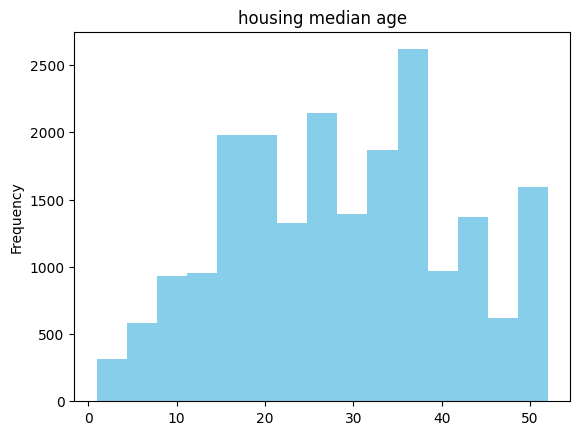

In [35]:
data['housing_median_age'].plot(kind='hist', color='skyblue', title='housing median age', bins=15)